In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

/var/folders/hk/p7fcnhm10z92trzs_9kwqlyr0000gn/T/ipykernel_68213/1449777021.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### working with different file formats

In [19]:
#Get the data set from the link below
# https://elasticbeanstalk-us-east-2-340729127361.s3.us-east-2.amazonaws.com/biostats.csv

url = 'https://elasticbeanstalk-us-east-2-340729127361.s3.us-east-2.amazonaws.com/biostats.csv'
data = pd.read_csv(url)
data.head()

,Name,"""Sex""","""Age""","""Height (in)""","""Weight (lbs)"""
0,Alex,"""M""",41,74,170
1,Bert,"""M""",42,68,166
2,Carl,"""M""",32,70,155
3,Dave,"""M""",39,72,167
4,Elly,"""F""",30,66,124


In [20]:
## Task 1
# 1) Select the name and corresponding age
# 2) Calculate the Body Mass Index in a seperate column. Hint: Transform your weight to kg and height to meters
# 3) Conduct the following basic statistical overview with pandas:
#    a) the info,
#    b) describe, 
#    c) all missing values 
# 4) Conduct 2 data visualisation exploration of your choice and comment on it
# 5) Use the heading and the information in the FIRST ROW only, make a simple dictionary and write
# to a json object "biostat.json"
    

In [21]:
data.columns

Index(['Name', '     "Sex"', ' "Age"', ' "Height (in)"', ' "Weight (lbs)"'], dtype='object')

In [22]:
# 1) Select the name and corresponding age
data_name_age = data[[data.columns[0], data.columns[2]]]
data_name_age.head()

,Name,"""Age"""
0,Alex,41
1,Bert,42
2,Carl,32
3,Dave,39
4,Elly,30


In [23]:
# 2) Calculate the Body Mass Index in a seperate column. Hint: Transform your weight to kg and height to meters
# kg/m2, 0.0254m,0.4536kg

data['BMI'] = data[data.columns[4]]*0.4536 / (data[data.columns[3]]*0.0254)**2
data.head()

,Name,"""Sex""","""Age""","""Height (in)""","""Weight (lbs)""",BMI
0,Alex,"""M""",41,74,170,21.826852
1,Bert,"""M""",42,68,166,25.240379
2,Carl,"""M""",32,70,155,22.240330
3,Dave,"""M""",39,72,167,22.649420
4,Elly,"""F""",30,66,124,20.014255


In [24]:
# 3) Conduct the following basic statistical overview with pandas:
#    a) the info,
#    b) describe, 
#    c) all missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             18 non-null     object 
 1        "Sex"       18 non-null     object 
 2    "Age"           18 non-null     int64  
 3    "Height (in)"   18 non-null     int64  
 4    "Weight (lbs)"  18 non-null     int64  
 5   BMI              18 non-null     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 992.0+ bytes


In [25]:
data.describe()

,"""Age""","""Height (in)""","""Weight (lbs)""",BMI
count,18.000000,18.000000,18.000000,18.000000
mean,34.666667,69.055556,146.722222,21.502487
std,7.577055,3.522570,22.540958,1.864613
min,23.000000,62.000000,98.000000,17.924552
25%,30.000000,66.250000,132.000000,20.587569
50%,32.500000,69.500000,150.000000,21.471906
75%,38.750000,71.750000,165.250000,22.206977
max,53.000000,75.000000,176.000000,25.240379


In [33]:
missing = data.isnull()
missing.head()

,Name,"""Sex""","""Age""","""Height (in)""","""Weight (lbs)""",BMI
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [30]:
data[data.columns[1]].value_counts()

     "Sex"
"M"    11
"F"     7
Name: count, dtype: int64

(array([1., 1., 1., 3., 1., 2., 4., 3., 0., 2.]),
 array([62. , 63.3, 64.6, 65.9, 67.2, 68.5, 69.8, 71.1, 72.4, 73.7, 75. ]),
 <BarContainer object of 10 artists>)

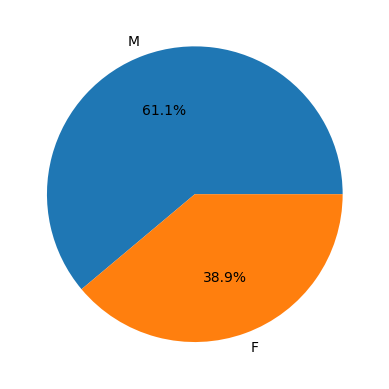

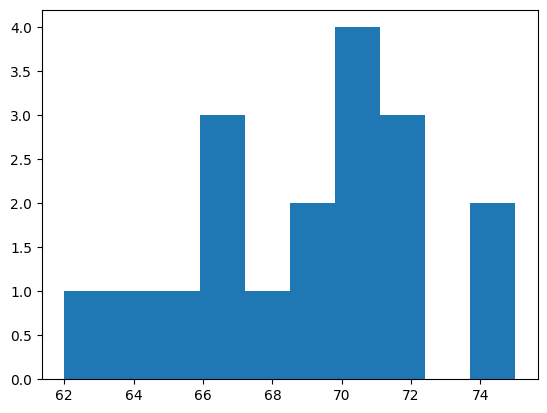

In [32]:
# 4) Conduct 2 data visualisation exploration of your choice and comment on it

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
plt.pie(data[data.columns[1]].value_counts(), labels=['M', 'F'], autopct='%1.1f%%')

plt.figure()
plt.hist(data[data.columns[3]])

1. There are 61.1% males, and 38.9% females.  
2. The heights of this sample set is left skewed and peak at around 71 lbs.  

In [29]:
# 5) Use the heading and the information in the FIRST ROW only, make a simple dictionary and write
# to a json object "biostat.json"
import json

data.columns
data_json = {}
for col in data.columns:
    data_json[col.strip().replace('"', '')] = data[col].values.tolist()

with open('biostat.json', 'w') as f:
    json.dump(data_json, f)

In [ ]:
## Task 2
# Create a simple file structure with the information below and generate the xml file as shown below
   <book>
      <author>Gambardella, Matthew</author>
      <title>XML Developers Guide</title>
      <genre>Computer</genre>
      <price>22.50</price>
      <publish_date>2022-10-01</publish_date>
      <description>An in-depth look at creating applications 
      with XML.</description>
   </book>

NameError: name 'xml' is not defined

# Solution